In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Amsterdam.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9659 non-null   int64  
 1   last_scraped                 9659 non-null   object 
 2   name                         9659 non-null   object 
 3   description                  9659 non-null   object 
 4   neighborhood_overview        9659 non-null   object 
 5   host_location                9659 non-null   object 
 6   host_response_time           9659 non-null   object 
 7   host_response_rate           9659 non-null   object 
 8   host_acceptance_rate         9659 non-null   object 
 9   host_is_superhost            9659 non-null   object 
 10  host_verifications           9659 non-null   object 
 11  host_has_profile_pic         9659 non-null   object 
 12  host_identity_verified       9659 non-null   object 
 13  neighbourhood     

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==2]

In [6]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [7]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Codigo para convertir un str en float
import re
Y= Y.apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [11]:
model.fit(X=X1, y=Y)

LinearRegression()

In [12]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(163.17633928571428)}

In [13]:
#Limpiar valores
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [14]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([163.17633929, 163.17633929, 163.17633929, ..., 163.17633929,
       163.17633929, 163.17633929], shape=(1344,))

<Axes: xlabel='room_type', ylabel='price'>

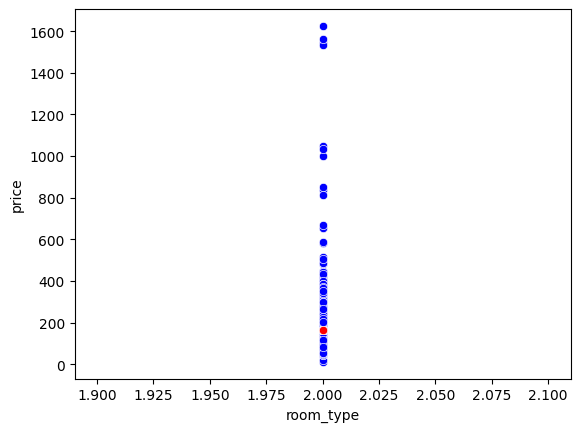

In [15]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [16]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [17]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [18]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [19]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [20]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [21]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [22]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.70187253]),
 'rank_': 1,
 'singular_': array([559.17788759]),
 'intercept_': np.float64(97.55700215103995)}

In [23]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [24]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([167.74425523, 167.74425523, 165.63863764, ..., 167.74425523,
       167.74425523, 136.86186387], shape=(1344,))

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

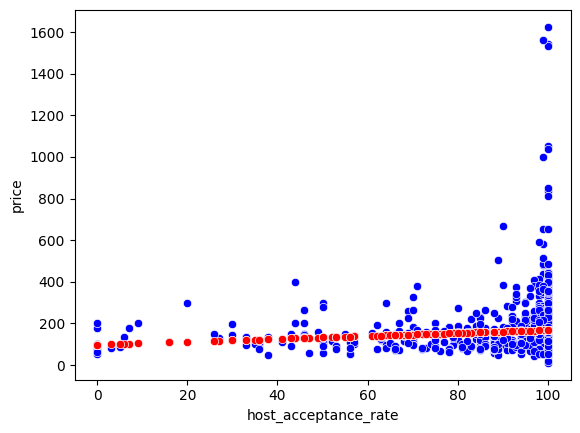

In [25]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [26]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.007809154422579234

In [27]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.08836942017790562)

In [28]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_22532\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [29]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [30]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [31]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [32]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([156.80904523, 168.26506024, 168.26506024, ..., 156.80904523,
       168.26506024, 156.80904523], shape=(1344,))

<Axes: xlabel='host_is_superhost', ylabel='price'>

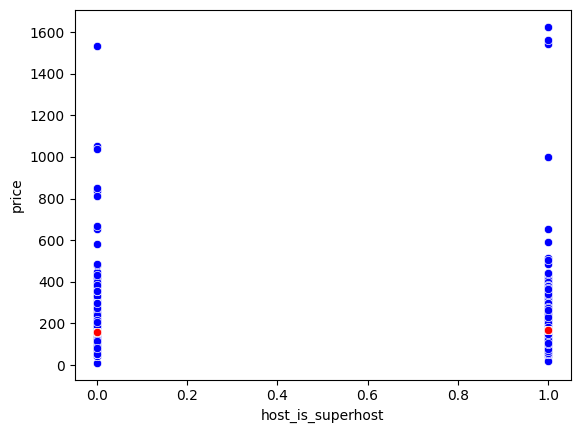

In [33]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [34]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.002207752340057989

In [35]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.04698672514719438)

In [36]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [37]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [38]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [39]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([2.35684524, 2.35684524, 2.35684524, ..., 2.35684524, 2.35684524,
       2.35684524], shape=(1344,))

<Axes: xlabel='bathrooms', ylabel='accommodates'>

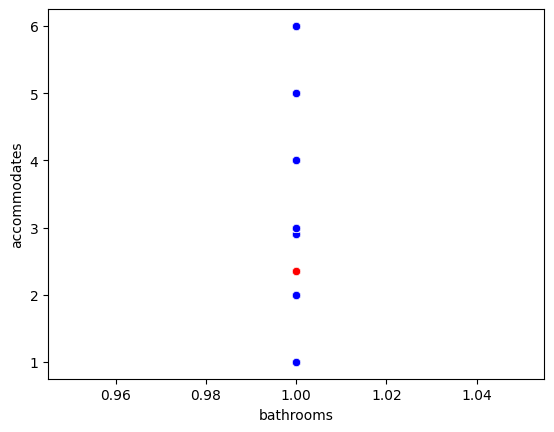

In [40]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [41]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.0

In [42]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [43]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [44]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [45]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [46]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [47]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([167.4093432 , 166.29067821, 169.27378485, ..., 155.47691662,
       164.05334822, 171.88400317], shape=(1344,))

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

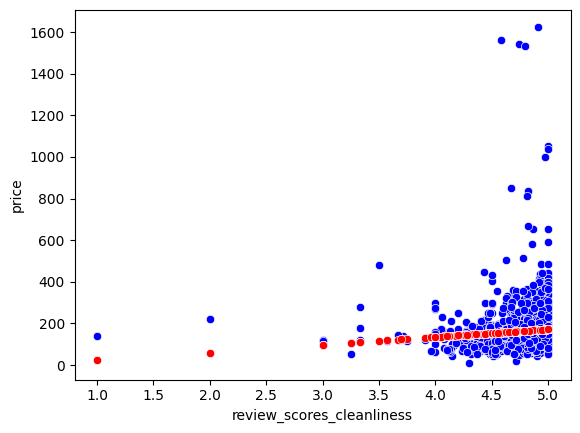

In [48]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [49]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.007440271289994249

In [50]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.08625700719358544)

In [51]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_22532\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [52]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [53]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [54]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [55]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([162.95072024, 162.95072024, 162.95072024, ..., 162.95072024,
       162.95072024, 162.95072024], shape=(1344,))

<Axes: xlabel='host_identity_verified', ylabel='price'>

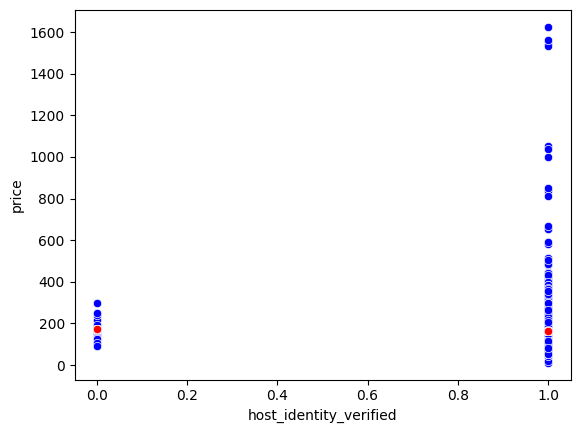

In [56]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [57]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.00018299663451615267

In [58]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.013527624866034416)

In [59]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_22532\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [60]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [61]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [62]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [63]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([162.76798561, 162.76798561, 163.46446701, ..., 162.76798561,
       162.76798561, 163.46446701], shape=(1344,))

<Axes: xlabel='instant_bookable', ylabel='price'>

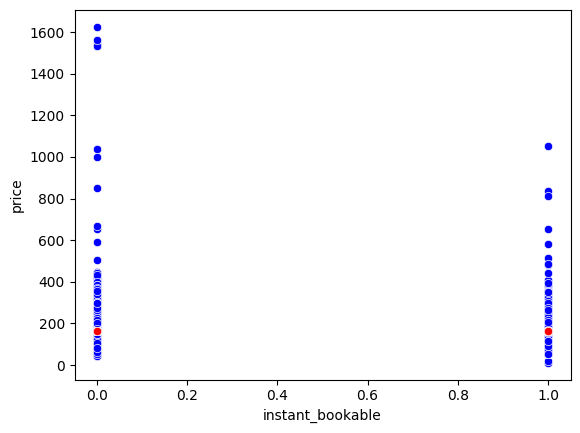

In [64]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [65]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

8.016934200383297e-06

In [66]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.0028314191142222826)

In [170]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Room in hotel': 22,
    'Private room in bed and breakfast':23,
    'Private room in guesthouse':24,
    'Private room in guest suite':25,
    'Private room in townhouse':26,
    'Private room in condo':27,
    'Private room in rental unit':28,
    'Room in boutique hotel':29,
    'Private room in home':30,
    'Private room':31,
    'Private room in houseboat':32,
    'Private room in loft':33,
    'Private room in casa particular':34,
    'Private room in boat':35,
    'Private room in hut':36,
    'Private room in farm stay':37,
    'Private room in bungalow':38,
    'Private room in serviced apartment':39,
    'Private room in hostel':40,
    'Private room in earthen home':41,
    'Private room in villa':42,
    'Private room in nature lodge':43,
    'Private room in cabin':44,
    'Private room in tiny home':45,
    'Private room in barn':46,
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_22532\3721894021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [171]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [172]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [173]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [174]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([164.83403617, 164.51684588, 164.19965559, ..., 164.51684588,
       162.61370412, 164.51684588], shape=(1344,))

<Axes: xlabel='property_type', ylabel='price'>

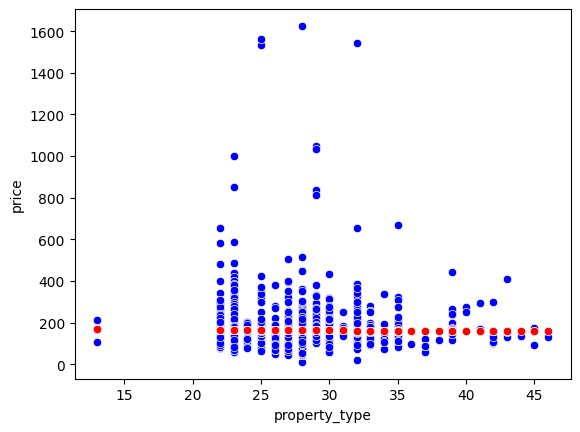

In [175]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [176]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.00011768899763364704

In [177]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.010848456002291158)

In [178]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [179]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [180]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [181]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [182]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[  0.        ,  38.10101811,   0.73407002, -16.01108659,
           1.32626608,  -2.27584691,  -0.60244618]]),
 'rank_': 6,
 'singular_': array([559.27427874, 151.67893946,  20.32127598,  15.13646826,
          9.06608532,   4.74888963,   0.        ]),
 'intercept_': array([-54.74103668])}

In [183]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([2.35684524])}

In [184]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[173.05818414],
       [172.63897349],
       [175.15824561],
       ...,
       [160.26341216],
       [166.73823532],
       [147.0046262 ]], shape=(1344, 1))

In [185]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [186]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
10,173.058184,269.0,2,4.88,100.0,1,0,1,3.0,1.0,22
31,172.638973,254.0,2,4.85,100.0,1,1,1,4.0,1.0,23
32,175.158246,203.0,2,4.93,97.0,1,1,0,4.0,1.0,24
36,173.328918,109.0,2,4.84,100.0,1,1,0,2.0,1.0,25
120,151.597890,84.0,2,4.38,100.0,1,0,1,2.0,1.0,26
...,...,...,...,...,...,...,...,...,...,...,...
9633,174.482163,160.0,2,4.93,100.0,1,1,1,2.0,1.0,25
9634,171.910717,150.0,2,4.95,94.0,1,1,0,2.0,1.0,27
9638,160.263412,115.0,2,4.56,100.0,1,0,1,2.0,1.0,23
9641,166.738235,265.0,2,4.79,100.0,1,1,1,3.0,1.0,29


In [187]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[2.35684524],
       [2.35684524],
       [2.35684524],
       ...,
       [2.35684524],
       [2.35684524],
       [2.35684524]], shape=(1344, 1))

In [188]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
10,173.058184,2.356845,269.0,2,4.88,100.0,1,0,1,3.0,1.0,22
31,172.638973,2.356845,254.0,2,4.85,100.0,1,1,1,4.0,1.0,23
32,175.158246,2.356845,203.0,2,4.93,97.0,1,1,0,4.0,1.0,24
36,173.328918,2.356845,109.0,2,4.84,100.0,1,1,0,2.0,1.0,25
120,151.597890,2.356845,84.0,2,4.38,100.0,1,0,1,2.0,1.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
9633,174.482163,2.356845,160.0,2,4.93,100.0,1,1,1,2.0,1.0,25
9634,171.910717,2.356845,150.0,2,4.95,94.0,1,1,0,2.0,1.0,27
9638,160.263412,2.356845,115.0,2,4.56,100.0,1,0,1,2.0,1.0,23
9641,166.738235,2.356845,265.0,2,4.79,100.0,1,1,1,3.0,1.0,29


In [189]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.016516596310791165

In [190]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.12851691060242293)

In [191]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.0

In [192]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.0)

In [193]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [194]:
df1= df1.drop(['room_type'], axis=1)

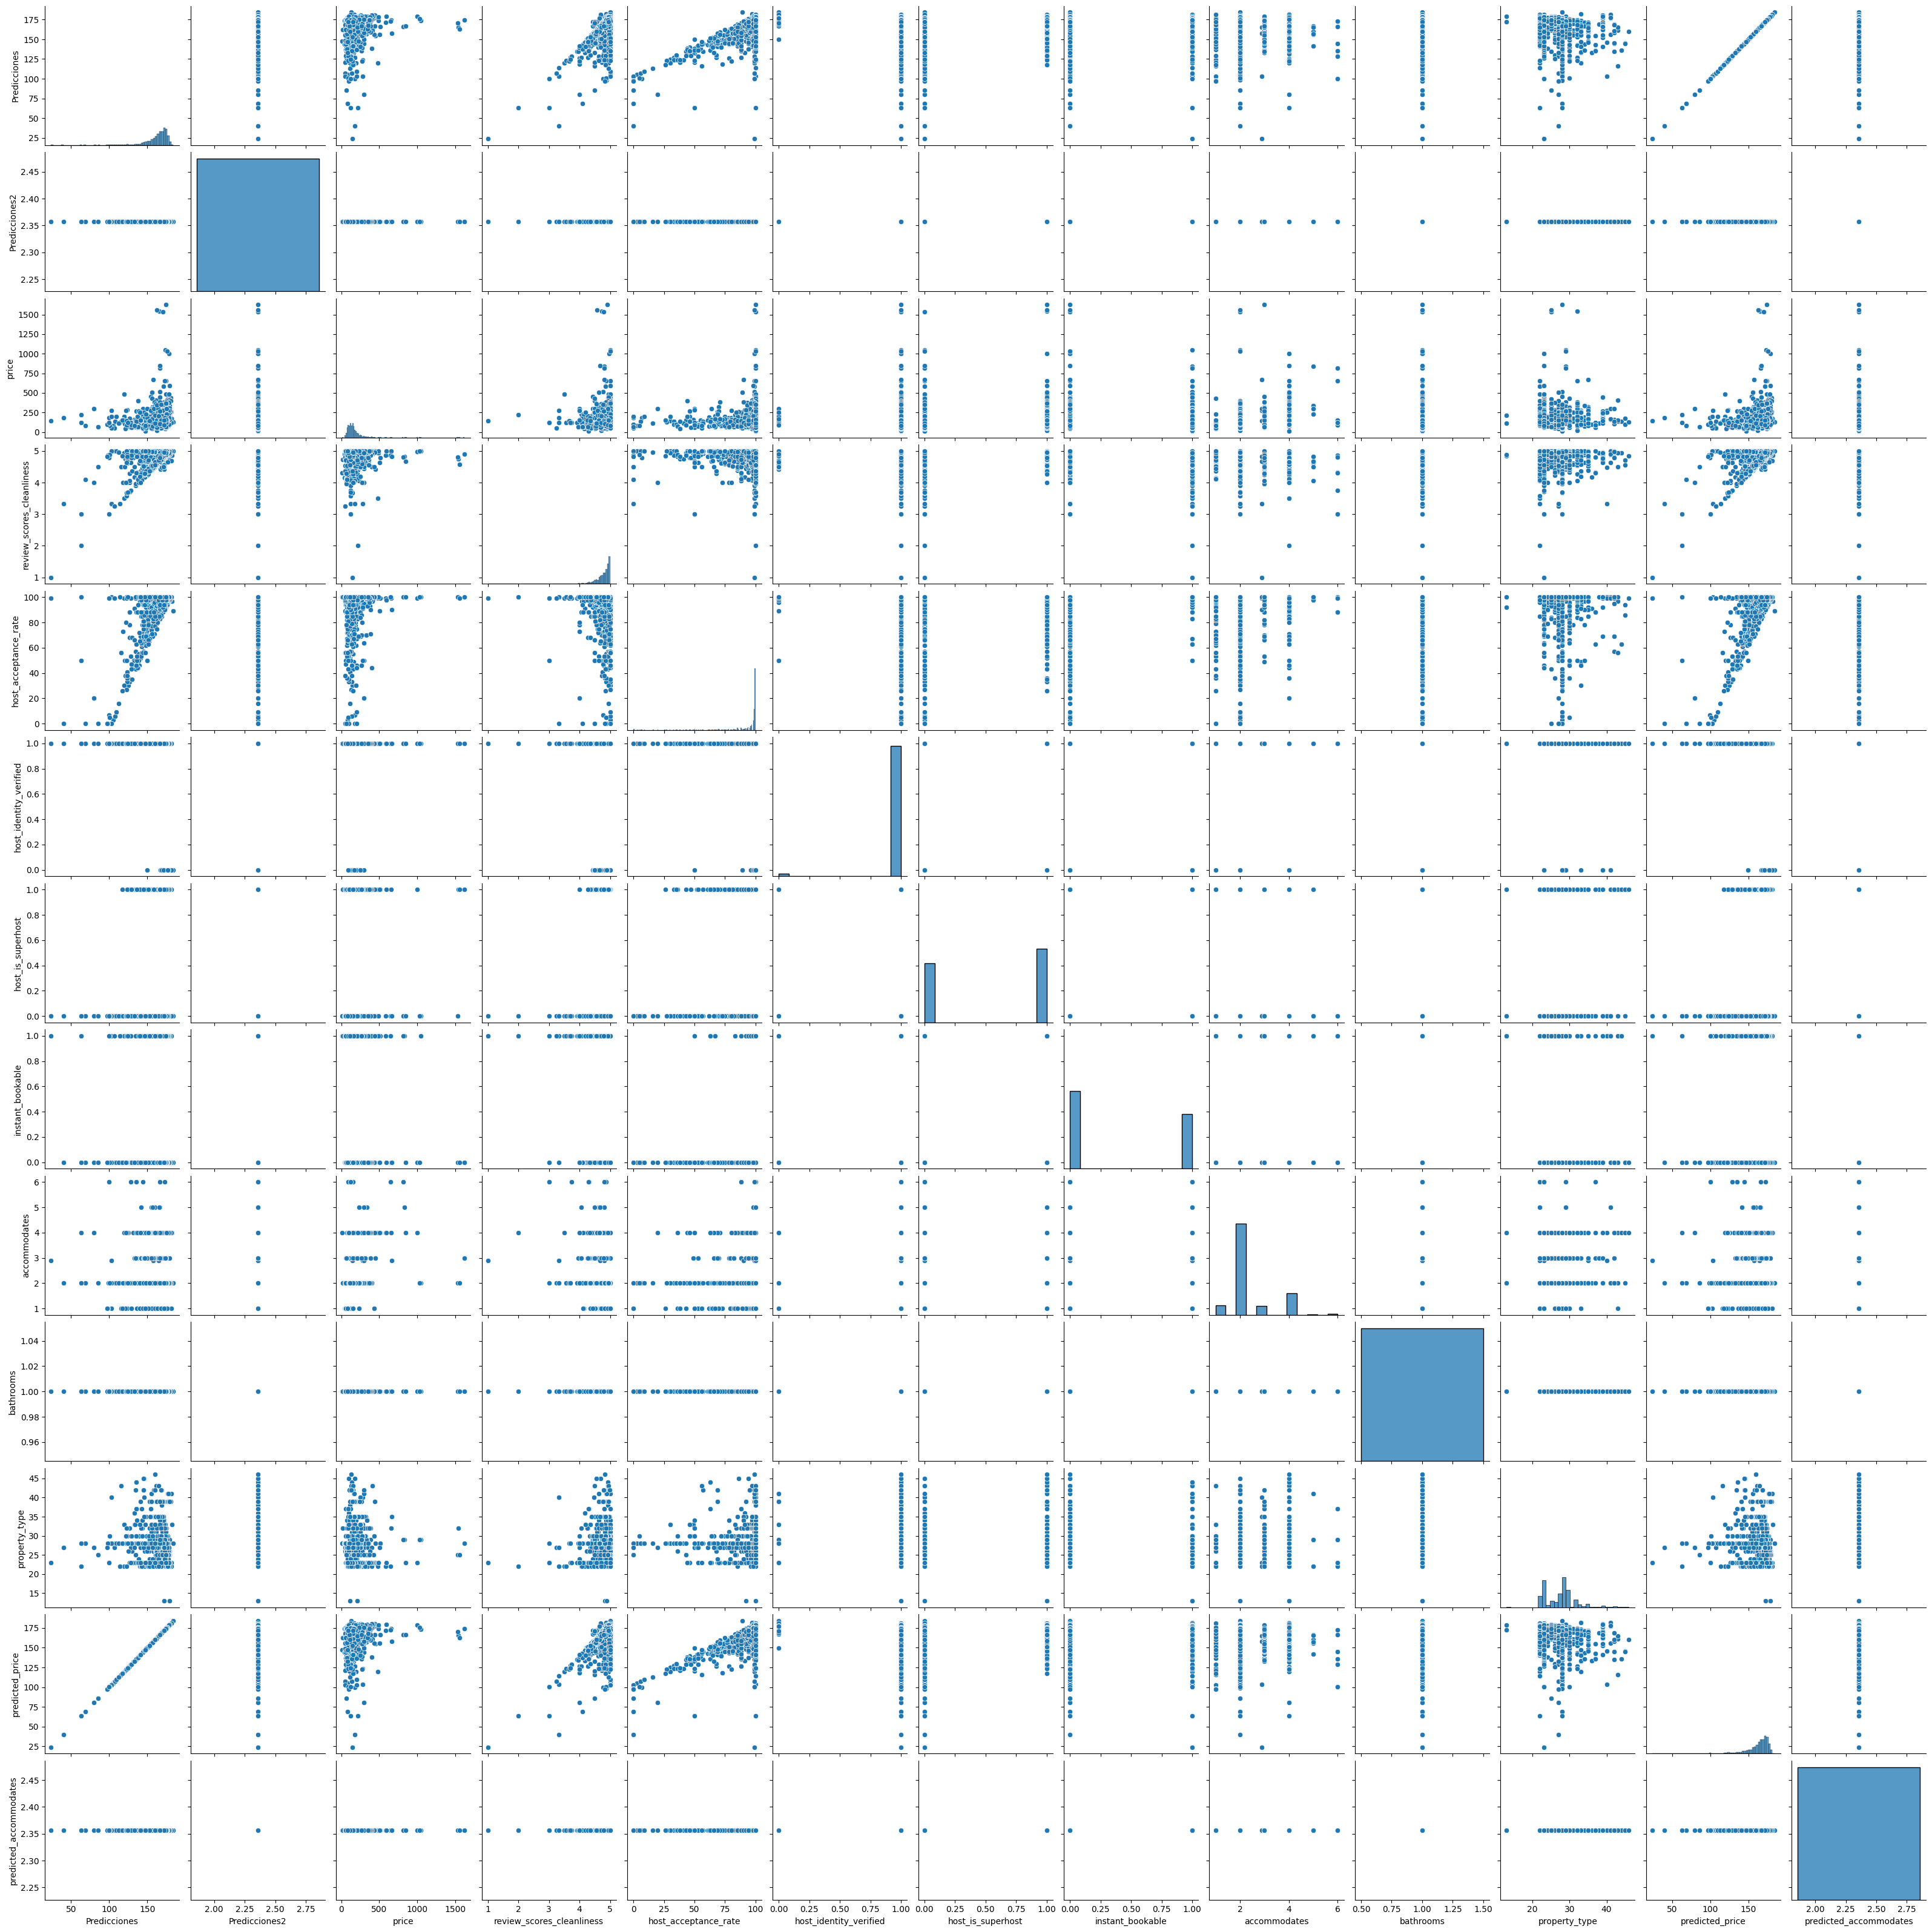

In [195]:
sns.pairplot(df1)

In [196]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.128517,0.671172,0.687609,-0.105259,0.365607,-0.022031,-0.004592,NaN,-0.084413,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.128517,NaN,1.000000,0.086257,0.088369,-0.013528,0.046987,-0.002831,0.331108,NaN,-0.010848,0.128517,NaN
review_scores_cleanliness,0.671172,NaN,0.086257,1.000000,-0.041492,0.012223,0.369448,-0.268656,-0.095267,NaN,0.112640,0.671172,NaN
host_acceptance_rate,0.687609,NaN,0.088369,-0.041492,1.000000,-0.027333,0.122878,0.290168,0.089231,NaN,-0.054905,0.687609,NaN
host_identity_verified,-0.105259,NaN,-0.013528,0.012223,-0.027333,1.000000,0.142917,-0.119171,-0.000491,NaN,-0.189189,-0.105259,NaN
host_is_superhost,0.365607,NaN,0.046987,0.369448,0.122878,0.142917,1.000000,-0.215960,0.012586,NaN,0.088196,0.365607,NaN
instant_bookable,-0.022031,NaN,-0.002831,-0.268656,0.290168,-0.119171,-0.215960,1.000000,0.073926,NaN,-0.112947,-0.022031,NaN
accommodates,-0.004592,NaN,0.331108,-0.095267,0.089231,-0.000491,0.012586,0.073926,1.000000,NaN,-0.008054,-0.004592,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.128517,0.671172,0.687609,0.105259,0.365607,0.022031,0.004592,NaN,0.084413,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.128517,NaN,1.000000,0.086257,0.088369,0.013528,0.046987,0.002831,0.331108,NaN,0.010848,0.128517,NaN
review_scores_cleanliness,0.671172,NaN,0.086257,1.000000,0.041492,0.012223,0.369448,0.268656,0.095267,NaN,0.112640,0.671172,NaN
host_acceptance_rate,0.687609,NaN,0.088369,0.041492,1.000000,0.027333,0.122878,0.290168,0.089231,NaN,0.054905,0.687609,NaN
host_identity_verified,0.105259,NaN,0.013528,0.012223,0.027333,1.000000,0.142917,0.119171,0.000491,NaN,0.189189,0.105259,NaN
host_is_superhost,0.365607,NaN,0.046987,0.369448,0.122878,0.142917,1.000000,0.215960,0.012586,NaN,0.088196,0.365607,NaN
instant_bookable,0.022031,NaN,0.002831,0.268656,0.290168,0.119171,0.215960,1.000000,0.073926,NaN,0.112947,0.022031,NaN
accommodates,0.004592,NaN,0.331108,0.095267,0.089231,0.000491,0.012586,0.073926,1.000000,NaN,0.008054,0.004592,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

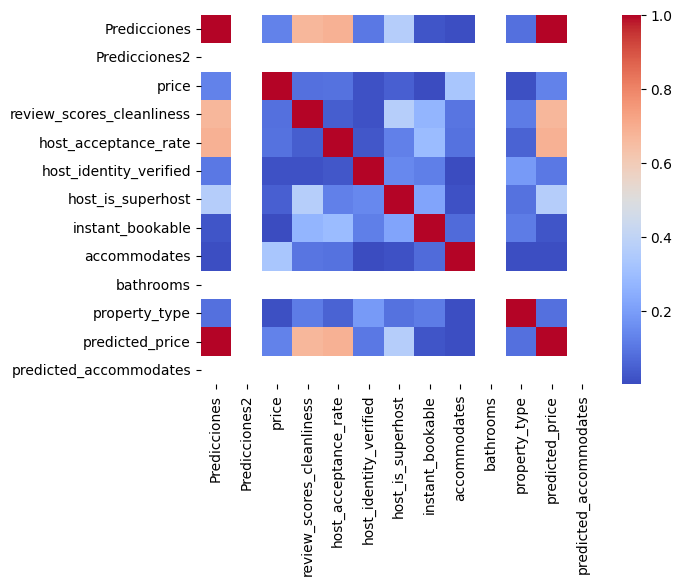

In [198]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

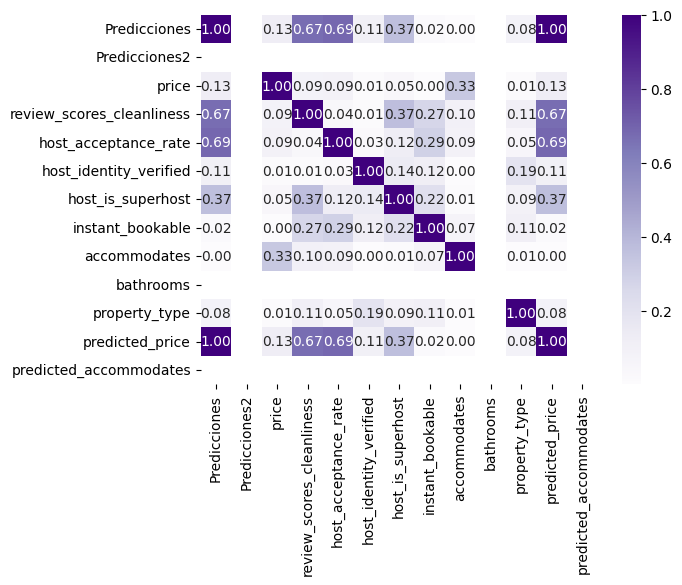

In [199]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [200]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.128517,0.671172,0.687609,-0.105259,0.365607,-0.022031,-0.004592,NaN,-0.084413,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.128517,NaN,1.000000,0.086257,0.088369,-0.013528,0.046987,-0.002831,0.331108,NaN,-0.010848,0.128517,NaN
review_scores_cleanliness,0.671172,NaN,0.086257,1.000000,-0.041492,0.012223,0.369448,-0.268656,-0.095267,NaN,0.112640,0.671172,NaN
host_acceptance_rate,0.687609,NaN,0.088369,-0.041492,1.000000,-0.027333,0.122878,0.290168,0.089231,NaN,-0.054905,0.687609,NaN
host_identity_verified,-0.105259,NaN,-0.013528,0.012223,-0.027333,1.000000,0.142917,-0.119171,-0.000491,NaN,-0.189189,-0.105259,NaN
host_is_superhost,0.365607,NaN,0.046987,0.369448,0.122878,0.142917,1.000000,-0.215960,0.012586,NaN,0.088196,0.365607,NaN
instant_bookable,-0.022031,NaN,-0.002831,-0.268656,0.290168,-0.119171,-0.215960,1.000000,0.073926,NaN,-0.112947,-0.022031,NaN
accommodates,-0.004592,NaN,0.331108,-0.095267,0.089231,-0.000491,0.012586,0.073926,1.000000,NaN,-0.008054,-0.004592,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.128517,0.671172,0.687609,0.105259,0.365607,0.022031,0.004592,NaN,0.084413,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.128517,NaN,1.000000,0.086257,0.088369,0.013528,0.046987,0.002831,0.331108,NaN,0.010848,0.128517,NaN
review_scores_cleanliness,0.671172,NaN,0.086257,1.000000,0.041492,0.012223,0.369448,0.268656,0.095267,NaN,0.112640,0.671172,NaN
host_acceptance_rate,0.687609,NaN,0.088369,0.041492,1.000000,0.027333,0.122878,0.290168,0.089231,NaN,0.054905,0.687609,NaN
host_identity_verified,0.105259,NaN,0.013528,0.012223,0.027333,1.000000,0.142917,0.119171,0.000491,NaN,0.189189,0.105259,NaN
host_is_superhost,0.365607,NaN,0.046987,0.369448,0.122878,0.142917,1.000000,0.215960,0.012586,NaN,0.088196,0.365607,NaN
instant_bookable,0.022031,NaN,0.002831,0.268656,0.290168,0.119171,0.215960,1.000000,0.073926,NaN,0.112947,0.022031,NaN
accommodates,0.004592,NaN,0.331108,0.095267,0.089231,0.000491,0.012586,0.073926,1.000000,NaN,0.008054,0.004592,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


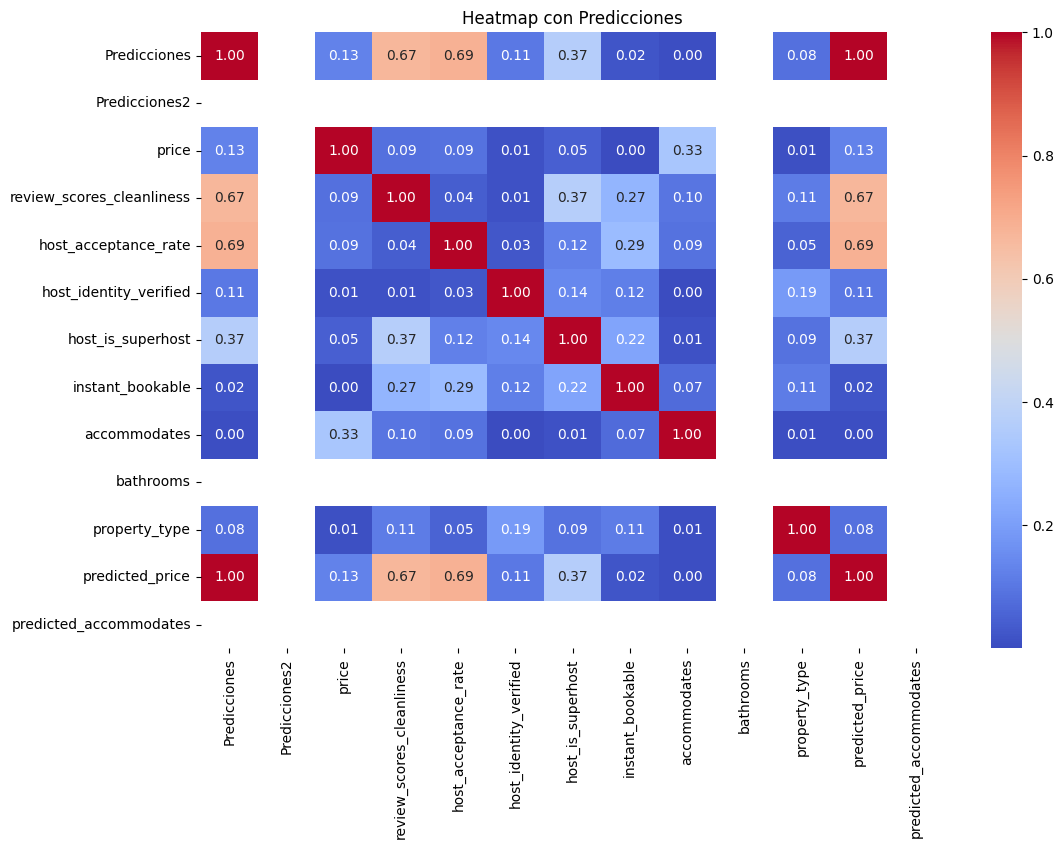

In [202]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()